In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,accuracy_score 
from sklearn.model_selection import cross_val_score

In [ ]:
# Read train and test sets
train = pd.read_csv("trainKNN.txt", header=None)
train.columns = ['ID', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type_of_glass']
train = train.drop('ID', axis=1) # Drop ID since irrelevant to predictions
test = pd.read_csv('testKNN.txt', header=None)
test.columns=['ID', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type_of_glass']
test = test.drop('ID', axis=1)

In [ ]:
train

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
191,1.51645,14.94,0.00,1.87,73.11,0.00,8.67,1.38,0.0,7
192,1.51831,14.39,0.00,1.82,72.86,1.41,6.47,2.88,0.0,7
193,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.0,7
194,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7


In [ ]:
print(train.shape)
print(test.shape)

(196, 10)
(18, 10)


In [ ]:
#no of glasses on different types!
train.Type_of_glass.value_counts()

2    73
1    67
7    26
3    14
5    10
6     6
Name: Type_of_glass, dtype: int64

**EDA**

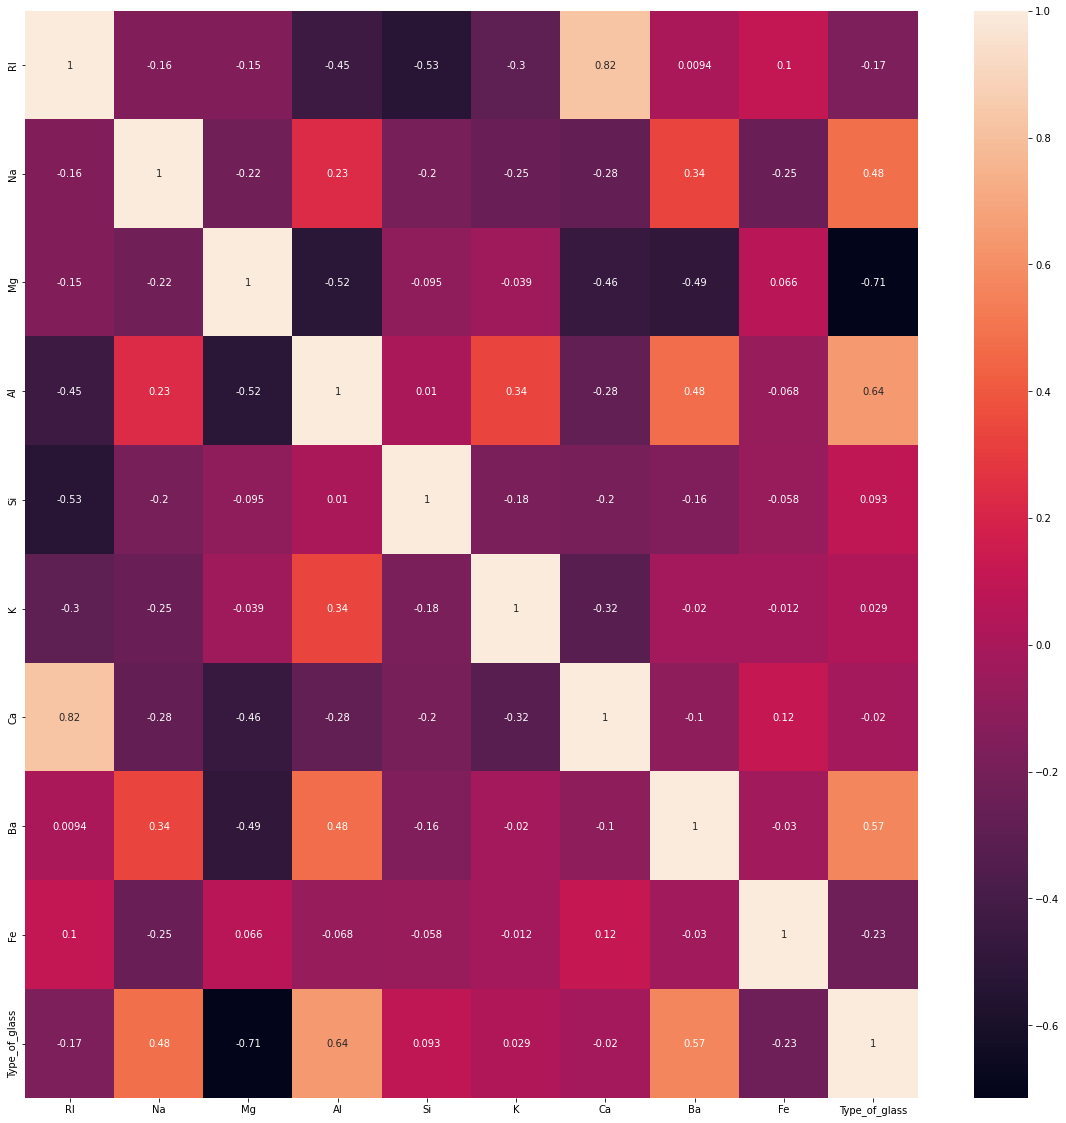

In [ ]:
cr=train.corr()
plt.figure(figsize=(20,20))
#for better visualiztion of correlation | use sns.heatmap()
sns.heatmap(cr,annot=True)

*Ca & RI* are highly correlated so we just avoid one to overcome OVERFITTING! 

In [ ]:
ntrain=train.drop(["Ca"],axis=1,inplace=True)
ntest=test.drop(["Ca"],axis=1,inplace=True)
print(train)

          RI     Na    Mg    Al     Si     K    Ba   Fe  Type_of_glass
0    1.52101  13.64  4.49  1.10  71.78  0.06  0.00  0.0              1
1    1.51761  13.89  3.60  1.36  72.73  0.48  0.00  0.0              1
2    1.51618  13.53  3.55  1.54  72.99  0.39  0.00  0.0              1
3    1.51766  13.21  3.69  1.29  72.61  0.57  0.00  0.0              1
4    1.51742  13.27  3.62  1.24  73.08  0.55  0.00  0.0              1
..       ...    ...   ...   ...    ...   ...   ...  ...            ...
191  1.51645  14.94  0.00  1.87  73.11  0.00  1.38  0.0              7
192  1.51831  14.39  0.00  1.82  72.86  1.41  2.88  0.0              7
193  1.51640  14.37  0.00  2.74  72.85  0.00  0.54  0.0              7
194  1.51623  14.14  0.00  2.88  72.61  0.08  1.06  0.0              7
195  1.51685  14.92  0.00  1.99  73.06  0.00  1.59  0.0              7

[196 rows x 9 columns]


pair plot shows there is no chance for linear decision boundries. because the datas are overlapped!

In [ ]:
###SCALING####
def standardize (df):
    for col in df.columns[:-1]: # Don't standardize the categories
      df[col] = (df[col] - df[col].mean())/df[col].std()
    return df

In [ ]:
train = standardize(train)
test = standardize(test)
train.head()

,RI,Na,Mg,Al,Si,K,Ba,Fe,Type_of_glass
0,0.888537,0.338119,1.242977,-0.720654,-1.120263,-0.682898,-0.33849,-0.581932,1
1,-0.224221,0.657345,0.603903,-0.191863,0.123880,-0.058551,-0.33849,-0.581932,1
2,-0.692234,0.197659,0.568000,0.174223,0.464382,-0.192340,-0.33849,-0.581932,1
3,-0.207857,-0.210950,0.668529,-0.334230,-0.033275,0.075237,-0.33849,-0.581932,1
4,-0.286405,-0.134335,0.618265,-0.435920,0.582248,0.045506,-0.33849,-0.581932,1


In [ ]:
#ASSAIGNINGN TRAIN & TEST DATASET!
x_train=train.iloc[:,:-1]
y_train=train.iloc[:,-1]
x_test=test.iloc[:,:-1]
y_test=test.iloc[:,-1]

**BEST VALUE FOR K**
by hit and trail and cross validation , here i got k=4 is better!

In [ ]:
for i in range(1,11):
  knn = KNeighborsClassifier(i) #initialising the model
  knn.fit(x_train,y_train) # training the model
  print("K value  : " , i, "trainscore:",knn.score(x_train,y_train)," trainscore : ", np.mean(cross_val_score(knn, x_train, y_train, cv=6,scoring="accuracy"))) #predicting using the model

K value  :  1 trainscore: 1.0  trainscore :  0.6068497474747475
K value  :  2 trainscore: 0.8316326530612245  trainscore :  0.6840277777777777
K value  :  3 trainscore: 0.8367346938775511  trainscore :  0.673611111111111
K value  :  4 trainscore: 0.7857142857142857  trainscore :  0.6990214646464646
K value  :  5 trainscore: 0.7959183673469388  trainscore :  0.6737689393939394
K value  :  6 trainscore: 0.7857142857142857  trainscore :  0.6377840909090909
K value  :  7 trainscore: 0.7551020408163265  trainscore :  0.6477272727272727
K value  :  8 trainscore: 0.7397959183673469  trainscore :  0.6530934343434344
K value  :  9 trainscore: 0.7397959183673469  trainscore :  0.6429924242424242
K value  :  10 trainscore: 0.7193877551020408  trainscore :  0.6581439393939393


In [ ]:
#manhattan
manh_knn=KNeighborsClassifier(n_neighbors=4,metric="manhattan")
manh_knn.fit(x_train,y_train)
manh_pred=manh_knn.predict(x_test)
print(classification_report(y_test,manh_pred))
print("ACCURACY:",accuracy_score(y_test,manh_pred))

              precision    recall  f1-score   support

           1       0.50      1.00      0.67         3
           2       0.33      0.67      0.44         3
           3       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         3
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         3

    accuracy                           0.61        18
   macro avg       0.47      0.61      0.52        18
weighted avg       0.47      0.61      0.52        18

ACCURACY: 0.6111111111111112


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
seq_knn=KNeighborsClassifier(n_neighbors=6,metric="sqeuclidean")
seq_knn.fit(x_train,y_train)
seq_pred=seq_knn.predict(x_test)
print(classification_report(y_test,seq_pred))
print("ACCURACY:",accuracy_score(y_test,seq_pred))

              precision    recall  f1-score   support

           1       0.50      1.00      0.67         3
           2       0.33      0.67      0.44         3
           3       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         3
           6       1.00      0.33      0.50         3
           7       0.75      1.00      0.86         3

    accuracy                           0.50        18
   macro avg       0.43      0.50      0.41        18
weighted avg       0.43      0.50      0.41        18

ACCURACY: 0.5


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


*from above two comparison ACCURACY of manhattan is better than squared euclidean distance metrics for predivtion!*

